In [2]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [3]:
student = BayesianModel()
student.add_nodes_from(['diff', 'intel', 'grade','sat','letter','apply','job'])
student.add_edges_from([('diff', 'grade'), ('intel', 'grade'), ('intel', 'sat'), ('grade', 'letter'),('apply', 'job'),('letter','job'),('sat','job')])


In [4]:
cpd_diff = TabularCPD('diff',2,[[0.6],
                                [0.4]],
                                evidence=[], evidence_card=[])
print(cpd_diff)

+--------+-----+
| diff_0 | 0.6 |
+--------+-----+
| diff_1 | 0.4 |
+--------+-----+


In [5]:
cpd_intel = TabularCPD('intel',2,[[0.1],
                                [0.9]],
                                evidence=[], evidence_card=[])
print(cpd_intel)

+---------+-----+
| intel_0 | 0.1 |
+---------+-----+
| intel_1 | 0.9 |
+---------+-----+


In [6]:
cpd_grade = TabularCPD('grade',3,[[0.3,0.05,0.9,0.5],
                                    [0.4,0.25,0.08,0.3],
                                    [0.3,0.7,0.02,0.2]],
                                    evidence=['intel', 'diff'], evidence_card=[2,2])
print(cpd_grade)

+---------+---------+---------+---------+---------+
| intel   | intel_0 | intel_0 | intel_1 | intel_1 |
+---------+---------+---------+---------+---------+
| diff    | diff_0  | diff_1  | diff_0  | diff_1  |
+---------+---------+---------+---------+---------+
| grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
+---------+---------+---------+---------+---------+
| grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
+---------+---------+---------+---------+---------+
| grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
+---------+---------+---------+---------+---------+


In [7]:
cpd_sat = TabularCPD('sat',2,[[0.95, 0.2],
                              [0.05, 0.8]],
                              evidence=['intel'], evidence_card=[2])
print(cpd_sat)

+-------+---------+---------+
| intel | intel_0 | intel_1 |
+-------+---------+---------+
| sat_0 | 0.95    | 0.2     |
+-------+---------+---------+
| sat_1 | 0.05    | 0.8     |
+-------+---------+---------+


In [8]:
cpd_letter = TabularCPD('letter',2,[[0.1, 0.4, 0.99],
                                    [0.9, 0.6, 0.01]],
                                    evidence=['grade'], evidence_card=[3])
print(cpd_letter)

+----------+---------+---------+---------+
| grade    | grade_0 | grade_1 | grade_2 |
+----------+---------+---------+---------+
| letter_0 | 0.1     | 0.4     | 0.99    |
+----------+---------+---------+---------+
| letter_1 | 0.9     | 0.6     | 0.01    |
+----------+---------+---------+---------+


In [9]:
cpd_apply = TabularCPD('apply',2,[[0.4],
                                  [0.6]],
                                  evidence=[], evidence_card=[])
print(cpd_apply)

+---------+-----+
| apply_0 | 0.4 |
+---------+-----+
| apply_1 | 0.6 |
+---------+-----+


In [10]:
cpd_job = TabularCPD('job',2,[[0.8, 0.8, 0.8, 0.8, 0.9, 0.4, 0.1, 0.1],
                              [0.2, 0.2, 0.2, 0.2, 0.1, 0.6, 0.9, 0.9]],
                              evidence=['apply','sat','letter'], evidence_card=[2,2,2])
print(cpd_job)

+--------+----------+----------+----------+----------+----------+----------+----------+----------+
| apply  | apply_0  | apply_0  | apply_0  | apply_0  | apply_1  | apply_1  | apply_1  | apply_1  |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+
| sat    | sat_0    | sat_0    | sat_1    | sat_1    | sat_0    | sat_0    | sat_1    | sat_1    |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+
| letter | letter_0 | letter_1 | letter_0 | letter_1 | letter_0 | letter_1 | letter_0 | letter_1 |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+
| job_0  | 0.8      | 0.8      | 0.8      | 0.8      | 0.9      | 0.4      | 0.1      | 0.1      |
+--------+----------+----------+----------+----------+----------+----------+----------+----------+
| job_1  | 0.2      | 0.2      | 0.2      | 0.2      | 0.1      | 0.6      | 0.9      | 0.9      |
+--------+

In [11]:
student.add_cpds(cpd_diff,cpd_intel, cpd_grade, cpd_sat, cpd_letter, cpd_apply, cpd_job)

In [12]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(student)

<img src="images/1.png">

In [13]:
mle = inference.map_query(variables={'intel','diff','grade','sat','letter','apply','job'},
                          evidence={})
print(mle)

{'intel': 1, 'sat': 1, 'job': 1, 'letter': 1, 'apply': 1, 'grade': 0, 'diff': 0}


In [14]:
mle = inference.query(variables={'intel','diff','grade','sat','letter','apply','job'},
                          evidence={})
print(mle['job'])

+-------+------------+
| job   |   phi(job) |
+=======+============+
| job_0 |     0.4595 |
+-------+------------+
| job_1 |     0.5405 |
+-------+------------+


<img src="images/2.png">

In [15]:
mle = inference.map_query(variables={'intel','diff','grade','sat','letter','apply'},
                          evidence={'job': 1})
print(mle)

{'intel': 1, 'sat': 1, 'letter': 1, 'apply': 1, 'grade': 0, 'diff': 0}


In [16]:
mle = inference.query(variables={'intel','diff','grade','sat','letter','apply'},
                          evidence={'job': 1})
print(mle['intel'])
print(mle['diff'])
print(mle['grade'])
print(mle['sat'])
print(mle['apply'])

+---------+--------------+
| intel   |   phi(intel) |
+=========+==============+
| intel_0 |       0.0508 |
+---------+--------------+
| intel_1 |       0.9492 |
+---------+--------------+
+--------+-------------+
| diff   |   phi(diff) |
+========+=============+
| diff_0 |      0.6094 |
+--------+-------------+
| diff_1 |      0.3906 |
+--------+-------------+
+---------+--------------+
| grade   |   phi(grade) |
+=========+==============+
| grade_0 |       0.7277 |
+---------+--------------+
| grade_1 |       0.1777 |
+---------+--------------+
| grade_2 |       0.0946 |
+---------+--------------+
+-------+------------+
| sat   |   phi(sat) |
+=======+============+
| sat_0 |     0.1684 |
+-------+------------+
| sat_1 |     0.8316 |
+-------+------------+
+---------+--------------+
| apply   |   phi(apply) |
+=========+==============+
| apply_0 |       0.1480 |
+---------+--------------+
| apply_1 |       0.8520 |
+---------+--------------+


<img src="images/3.png">

In [17]:
mle = inference.map_query(variables={'intel'},
                          evidence={'job': 1})
print(mle)

{'intel': 1}


In [18]:
mle = inference.query(variables={'intel'},
                          evidence={'job': 1})
print(mle['intel'])

+---------+--------------+
| intel   |   phi(intel) |
+=========+==============+
| intel_0 |       0.0508 |
+---------+--------------+
| intel_1 |       0.9492 |
+---------+--------------+


In [19]:
def joint_probability_all(diff_value, intel_value, grade_value, letter_value, sat_value, apply_value, job_value):

    joint_prob = 1 
    
    variables = ['diff','intel','grade','letter','sat','apply','job']

    if 'diff' in variables:
        joint_prob = joint_prob * cpd_diff.values[diff_value]
#         print(cpd_diff.values[diff_value])

    if 'intel' in variables:
        joint_prob = joint_prob * cpd_intel.values[intel_value]
#         print(cpd_intel.values[intel_value])

    if 'grade' in variables:
        joint_prob = joint_prob * cpd_grade.values[grade_value][intel_value][diff_value]
#         print(cpd_grade.values[grade_value][intel_value][diff_value])

    if 'letter' in variables:
        joint_prob = joint_prob * cpd_letter.values[letter_value][grade_value]
#         print(cpd_letter.values[letter_value][grade_value])

    if 'sat' in variables:
        joint_prob = joint_prob * cpd_sat.values[sat_value][intel_value]
#         print(cpd_sat.values[sat_value][intel_value])

    if 'apply' in variables:
        joint_prob = joint_prob * cpd_apply.values[apply_value]
#         print(cpd_apply.values[apply_value])

    if 'job' in variables:
        joint_prob = joint_prob * cpd_job.values[job_value][apply_value][sat_value][letter_value]
#         print(cpd_job.values[job_value][apply_value][sat_value][letter_value])

    return joint_prob

joint_probability_all(0,0,0,1,0,1,1)

0.005540399999999999

In [20]:
import pandas as pd
counter = 0
max_prob = 0
joint_probability_set = {'diff':[],'intel':[],'grade':[],'letter':[],'sat':[],'apply':[],'job':[], 'probability': []}


for diff_value in [0,1]:
    for intel_value in [0,1]:
        for grade_value in [0,1,2]:
            for letter_value in [0,1]:
                for sat_value in [0,1]:
                    for apply_value in [0,1]:
                        for job_value in [0,1]:
                            
                            jp = joint_probability_all(diff_value, 
                                                        intel_value, 
                                                        grade_value, 
                                                        letter_value, 
                                                        sat_value, 
                                                        apply_value, 
                                                        job_value)
                            
                            joint_probability_set['diff'].append(diff_value)
                            joint_probability_set['intel'].append(intel_value)
                            joint_probability_set['grade'].append(grade_value)
                            joint_probability_set['letter'].append(letter_value)
                            joint_probability_set['sat'].append(sat_value)
                            joint_probability_set['apply'].append(apply_value)
                            joint_probability_set['job'].append(job_value)
                            joint_probability_set['probability'].append(jp)
                                
#                             print(diff_value, 
#                                   intel_value, 
#                                   grade_value, 
#                                   letter_value,
#                                   sat_value, 
#                                   apply_value,
#                                   job_value,
#                                   jp
#                                   )
joint_probability_df = pd.DataFrame(joint_probability_set)
joint_probability_df.to_csv('joint_probability.csv')                         

<img src="images/4.png">

In [33]:
from pgmpy.sampling import BayesianModelSampling

forward_sampler = BayesianModelSampling(student)
samples = forward_sampler.forward_sample(size=1000)

<img src="images/5.png">

In [22]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import pandas as pd

output_dim = nb_classes = 2
model = Sequential() 
model.add(Dense(output_dim, input_dim=1, activation='softmax')) 
batch_size = 10
nb_epoch = 100
model.summary()

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [23]:
def datagen(student_sample, percentage_split):
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    
    for index, sample in student_sample.iterrows():
        if(index < int(samples.shape[0]*percentage_split/100)):
            X_train.append([sample['job']])
            temp = np.zeros(2)
            temp[sample['intel']] = 1
            Y_train.append(temp)
        else:
            X_test.append([sample['job']])  
            temp = np.zeros(2)
            temp[sample['intel']] = 1
            Y_test.append(temp)
    X_train = np.asarray(X_train)
    Y_train = np.asarray(Y_train)
    X_test = np.asarray(X_test)
    Y_test = np.asarray(Y_test)
    return (X_train,Y_train),(X_test,Y_test)


In [24]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

In [25]:
import numpy as np
percentage_split = 80
(X_train,Y_train),(X_test,Y_test) = datagen(samples,percentage_split)
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
# score = model.evaluate(X_test, Y_test, verbose=0) 
# print('Test score:', score[0]) 
# print('Test accuracy:', score[1])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 800 samples, validate on 200 samples
Epoch 1/100
800/800 [==============================] - 0s 283us/step - loss: 0.5779 - acc: 0.8800 - val_loss: 0.4872 - val_acc: 0.8850
Epoch 2/100
800/800 [==============================] - 0s 90us/step - loss: 0.4530 - acc: 0.8850 - val_loss: 0.4108 - val_acc: 0.8850
Epoch 3/100
800/800 [==============================] - 0s 89us/step - loss: 0.4022 - acc: 0.8850 - val_loss: 0.3772 - val_acc: 0.8850
Epoch 4/100
800/800 [==============================] - 0s 94us/step - loss: 0.3782 - acc: 0.8850 - val_loss: 0.3604 - val_acc: 0.8850
Epoch 5/100
800/800 [==============================] - 0s 94us/step - loss: 0.3656 - acc: 0.8850 - val_loss: 0.3513 - val_acc: 0.8850
Epoch 6/100
800/800 [==============================] - 0s 81us/step - loss: 0.3584 - acc: 0.8850 - val_loss: 0.3460 - val_acc: 0.8850
Epoch 7/100
800/800 [==============================] - 0s 76us/step - loss: 0.3542 - acc: 0.8850 - val_loss: 0.3429 - val_acc: 0.8850
Epoch 8/100
800

800/800 [==============================] - 0s 80us/step - loss: 0.3472 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 62/100
800/800 [==============================] - 0s 77us/step - loss: 0.3472 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 63/100
800/800 [==============================] - 0s 72us/step - loss: 0.3472 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 64/100
800/800 [==============================] - 0s 80us/step - loss: 0.3472 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 65/100
800/800 [==============================] - 0s 78us/step - loss: 0.3471 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 66/100
800/800 [==============================] - 0s 91us/step - loss: 0.3472 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 67/100
800/800 [==============================] - 0s 73us/step - loss: 0.3472 - acc: 0.8850 - val_loss: 0.3377 - val_acc: 0.8850
Epoch 68/100
800/800 [==============================] - 0s 72us/step

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1251587f0>,
      dtype=object)

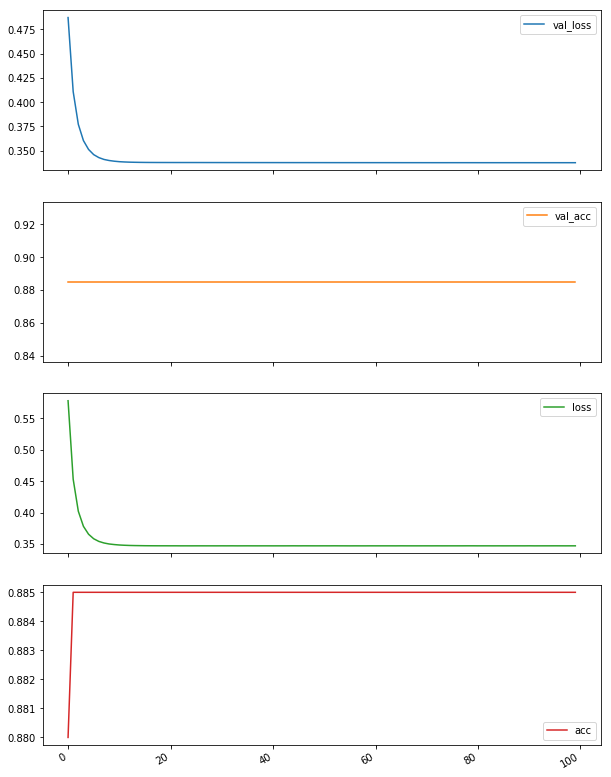

In [28]:
%matplotlib inline
df_hist = pd.DataFrame(history.history)
df_hist.plot(subplots=True, figsize=(10,15))

In [29]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(samples, test_size=0.2)

In [30]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [31]:
student = BayesianModel()
student.add_nodes_from(['diff', 'intel', 'grade','sat','letter','apply','job'])
student.add_edges_from([('diff', 'grade'), 
                        ('intel', 'grade'), 
                        ('intel', 'sat'), 
                        ('grade', 'letter'),
                        ('apply', 'job'),
                        ('letter','job'),
                        ('sat','job')])
student.fit(train)

In [228]:
inference = VariableElimination(student)
counter = 0
for index, row in test.iterrows():
    mle1 = inference.map_query(variables={'sat','letter'},
                          evidence={'job': row['job']})
    mle2 = inference.map_query(variables={'intel'},
                          evidence={'sat': mle1['sat'], 
                                    'letter': mle1['letter']})
    if(mle2['intel'] == row['intel']):
        counter += 1
        
print('Accuracy is: ' + str(counter/test.shape[0]*100))

Accuracy is: 88.125


In [147]:
mle = inference.query(variables={'intel'},
                          evidence={'job': 1})

In [148]:
print(mle['intel'])

+---------+--------------+
| intel   |   phi(intel) |
+=========+==============+
| intel_0 |       0.0508 |
+---------+--------------+
| intel_1 |       0.9492 |
+---------+--------------+


In [149]:
mle = inference.query(variables={'job'})

In [150]:
print(mle['job'])

+-------+------------+
| job   |   phi(job) |
+=======+============+
| job_0 |     0.4595 |
+-------+------------+
| job_1 |     0.5405 |
+-------+------------+


In [151]:
model.predict(np.array([[1]]))

array([[0.04455127, 0.95544875]], dtype=float32)

In [152]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [153]:
student = BayesianModel()
student.add_nodes_from(['diff', 'intel', 'grade','sat','letter'])
student.add_edges_from([('diff', 'grade'), ('intel', 'grade'), ('intel', 'sat'), ('grade', 'letter')])


In [154]:
cpd_diff = TabularCPD('diff',2,[[0.6],
                                [0.4]],
                                evidence=[], evidence_card=[])
print(cpd_diff)

+--------+-----+
| diff_0 | 0.6 |
+--------+-----+
| diff_1 | 0.4 |
+--------+-----+


In [155]:
cpd_intel = TabularCPD('intel',2,[[0.7],
                                [0.3]],
                                evidence=[], evidence_card=[])
print(cpd_intel)

+---------+-----+
| intel_0 | 0.7 |
+---------+-----+
| intel_1 | 0.3 |
+---------+-----+


In [156]:
cpd_grade = TabularCPD('grade',3,[[0.3,0.05,0.9,0.5],
                                    [0.4,0.25,0.08,0.3],
                                    [0.3,0.7,0.02,0.2]],
                                    evidence=['intel', 'diff'], evidence_card=[2,2])
print(cpd_grade)

+---------+---------+---------+---------+---------+
| intel   | intel_0 | intel_0 | intel_1 | intel_1 |
+---------+---------+---------+---------+---------+
| diff    | diff_0  | diff_1  | diff_0  | diff_1  |
+---------+---------+---------+---------+---------+
| grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
+---------+---------+---------+---------+---------+
| grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
+---------+---------+---------+---------+---------+
| grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
+---------+---------+---------+---------+---------+


In [157]:
cpd_sat = TabularCPD('sat',2,[[0.95, 0.2],
                              [0.05, 0.8]],
                              evidence=['intel'], evidence_card=[2])
print(cpd_sat)

+-------+---------+---------+
| intel | intel_0 | intel_1 |
+-------+---------+---------+
| sat_0 | 0.95    | 0.2     |
+-------+---------+---------+
| sat_1 | 0.05    | 0.8     |
+-------+---------+---------+


In [158]:
cpd_letter = TabularCPD('letter',2,[[0.1, 0.4, 0.99],
                                    [0.9, 0.6, 0.01]],
                                    evidence=['grade'], evidence_card=[3])
print(cpd_letter)

+----------+---------+---------+---------+
| grade    | grade_0 | grade_1 | grade_2 |
+----------+---------+---------+---------+
| letter_0 | 0.1     | 0.4     | 0.99    |
+----------+---------+---------+---------+
| letter_1 | 0.9     | 0.6     | 0.01    |
+----------+---------+---------+---------+


In [159]:
student.add_cpds(cpd_diff,cpd_intel, cpd_grade, cpd_sat, cpd_letter)

In [1]:
from pgmpy.sampling import BayesianModelSampling

forward_sampler = BayesianModelSampling(student)
samples = forward_sampler.forward_sample(size=1000)
samples

NameError: name 'student' is not defined

In [161]:
def datagen(student_sample, percentage_split):
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    
    for index, sample in student_sample.iterrows():
        if(index < int(samples.shape[0]*percentage_split/100)):
            X_train.append([sample['job']])
            temp = np.zeros(2)
            temp[sample['intel']] = 1
            Y_train.append(temp)
        else:
            X_test.append([sample['job']])  
            temp = np.zeros(2)
            temp[sample['intel']] = 1
            Y_test.append(temp)
    X_train = np.asarray(X_train)
    Y_train = np.asarray(Y_train)
    X_test = np.asarray(X_test)
    Y_test = np.asarray(Y_test)
    return (X_train,Y_train),(X_test,Y_test)

In [162]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
import pandas as pd

output_dim = nb_classes = 2
model = Sequential() 
model.add(Dense(output_dim, input_dim=1, activation='softmax')) 
batch_size = 10
nb_epoch = 100
model.summary()

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [113]:
import numpy as np
percentage_split = 80
(X_train,Y_train),(X_test,Y_test) = datagen(samples,percentage_split)
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
# score = model.evaluate(X_test, Y_test, verbose=0) 
# print('Test score:', score[0]) 
# print('Test accuracy:', score[1])

KeyError: 'job'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1211cb550>,
      dtype=object)

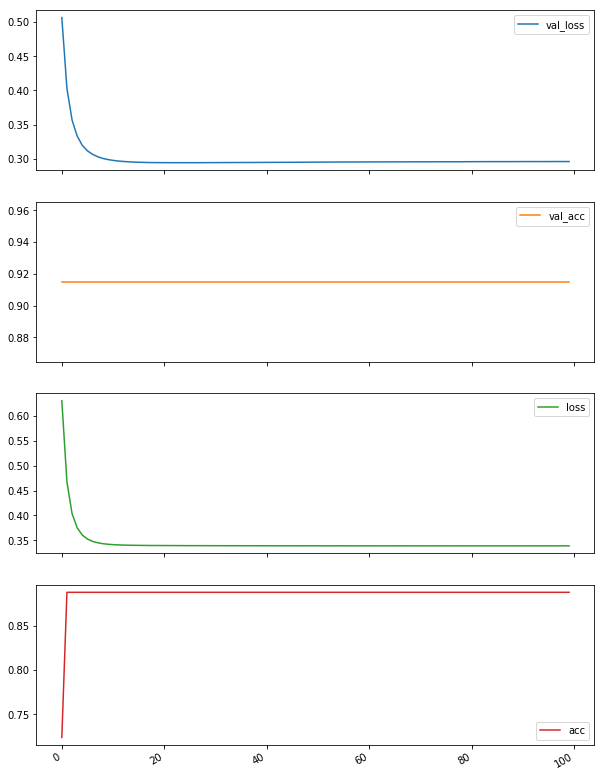

In [112]:
%matplotlib inline
df_hist = pd.DataFrame(history.history)
df_hist.plot(subplots=True, figsize=(10,15))

In [114]:
model.predict([1])

array([[0.8473722 , 0.15262789]], dtype=float32)